In [108]:
#Importing the libraries
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  

In [109]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [110]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Reading and Understanding the data

In [111]:
#importing the dataset

day = pd.read_csv("day.csv")

In [112]:
#checking the shape

day.shape

(730, 16)

In [113]:
#Checking the head of dataset

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
#Checking the datatyes of columns

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [115]:
#Checking the statistical summary of numerical columns

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [116]:
#checking for null values

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can observe that the dataset has no null values

<b> Converting features into categorical Strings <b>

<i>Converting weathersit feature into categorical strings as the numerical values have no specific order<br>
<br>
weathersit : <br>
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloudsk
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
coverting it into
1: Clear
2: Mist
3: Light Snow
4: Snow<i>

In [117]:
def weather(x):
    output=''
    if x==1:
        output='Clear'
    elif x==2:
        output='Mist'
    elif x==3:
        output='Light Snow'
    else: output = 'Snow'
    return output

day['weathersit']=day['weathersit'].apply(weather)

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
day['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

<i>Converting season into categorical string<br>
    season (1:spring, 2:summer, 3:fall, 4:winter)<i>

In [119]:
def seasons(x):
    output=''
    if x==1:
        output='spring'
    elif x==2:
        output='summer'
    elif x==3:
        output='fall'
    else: output = 'winter'
    return output

day['season']=day['season'].apply(seasons)

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [120]:
day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

<i>Converting month into categorical string<i>

In [121]:
def months(x):
    output=''
    if x==1:
        output='January'
    elif x==2:
        output='February'
    elif x==3:
        output='March'
    elif x==4:
        output='April'
    elif x==5:
        output='May'
    elif x==6:
        output='June'
    elif x==7:
        output='July'
    elif x==8:
        output='August'
    elif x==9:
        output='September'
    elif x==10:
        output='October'
    elif x==11:
        output='November'
    elif x==12:
        output='December'
    return output

day['mnth']=day['mnth'].apply(months)

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [122]:
day['mnth'].value_counts()

May          62
March        62
July         62
October      62
December     62
August       62
January      62
April        60
November     60
June         60
September    60
February     56
Name: mnth, dtype: int64

<i>Converting weekday to categorical strings<i>

In [123]:
day[['weekday','workingday']].value_counts()

weekday  workingday
1        1             105
0        0             104
6        0             104
4        1             103
5        1             103
2        1             100
3        1              93
         0              11
2        0               5
4        0               1
5        0               1
dtype: int64

we can observe that 0 and 6 have values as 0 as working day. So we can assume weekday starts with Sunday

In [124]:
def weekdays(x):
    output=''
    if x==0:
        output='Sunday'
    elif x==1:
        output='Monday'
    elif x==2:
        output='Tuesday'
    elif x==3:
        output='Wednesday'
    elif x==4:
        output='Thursday'
    elif x==5:
        output='Friday'
    else:
        output='Saturday'
    return output

day['weekday']=day['weekday'].apply(weekdays)

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [125]:
day['weekday'].value_counts()

Tuesday      105
Monday       105
Sunday       104
Friday       104
Thursday     104
Saturday     104
Wednesday    104
Name: weekday, dtype: int64

<i> Converting year to categorical string<i>

In [126]:
def year(x):
    output=''
    if x==0:
        output='2018'
    else:
        output='2019'
    return output

day['yr']=day['yr'].apply(year)

In [127]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [128]:
day['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

<i>Converting holiday to categorical string<br>
     0 - working
     1 - holiday

In [129]:
def holiday(x):
    output=''
    if x==0:
        output='working'
    else:
        output='holiday'
    return output

day['holiday']=day['holiday'].apply(holiday)

In [130]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,working,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,working,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,working,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,working,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,working,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [131]:
day['holiday'].value_counts()

working    709
holiday     21
Name: holiday, dtype: int64

<i>Converting workind day to categorical string<br>
    0 - Holiday
    1 - WorkingDay
<i>

In [132]:
def workingday(x):
    output=''
    if x==1:
        output='workingday'
    else:
        output='holiday'
    return output

day['workingday']=day['workingday'].apply(workingday)

In [133]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,working,Monday,workingday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,working,Tuesday,workingday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,working,Wednesday,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,working,Thursday,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,working,Friday,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [134]:
day['workingday'].value_counts()

workingday    504
holiday       226
Name: workingday, dtype: int64

### Data Visualization

<b><i>Visualising Numeric Variables<i><b>

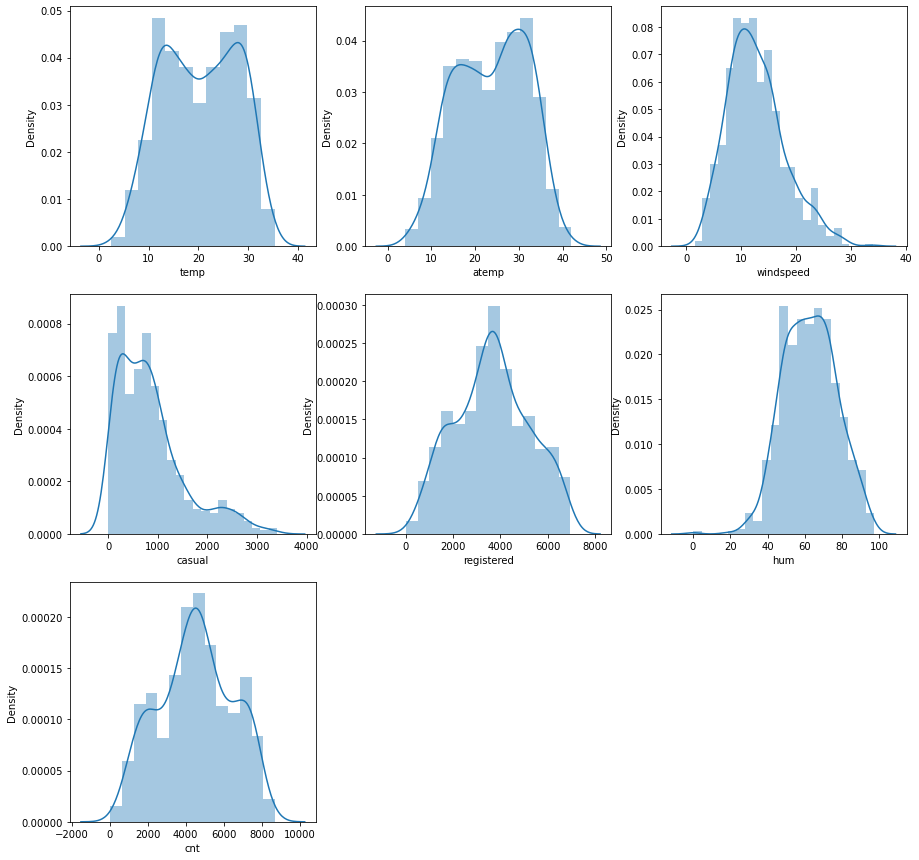

In [135]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.distplot(day['temp'])
plt.subplot(3,3,2)
sns.distplot(day['atemp'])
plt.subplot(3,3,3)
sns.distplot(day['windspeed'])
plt.subplot(3,3,4)
sns.distplot(day['casual'])
plt.subplot(3,3,5)
sns.distplot(day['registered'])
plt.subplot(3,3,6)
sns.distplot(day['hum'])
plt.subplot(3,3,7)
sns.distplot(day['cnt'])
plt.show();

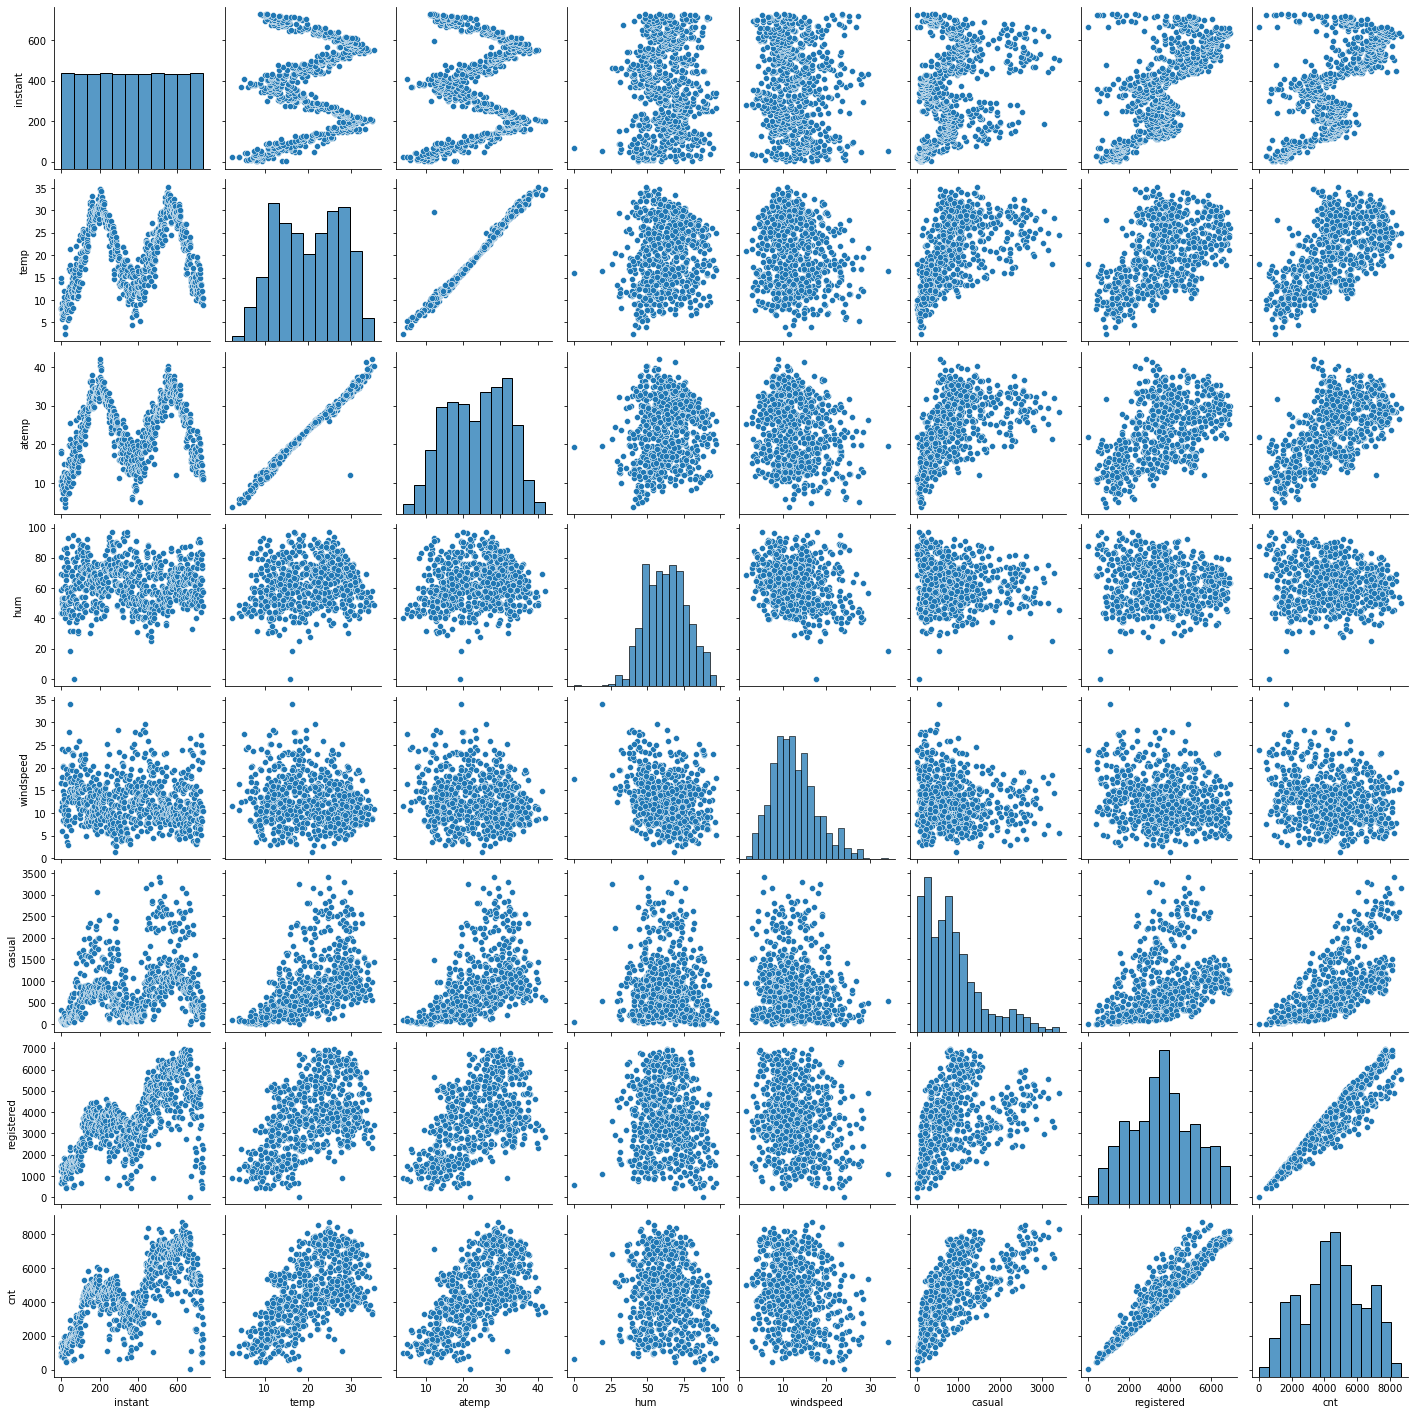

In [136]:
sns.pairplot(day)
plt.show()

There is linear relationship between temp and a temp, registered and cnt and somehwat for casual and cnt as well

<b><i>Visualizing categorical variables<i><b>

In [137]:
day['dteday'] = day['dteday'].astype('datetime64')

In [138]:
categorical = day.select_dtypes(exclude=['float64','datetime64','int64'])
categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

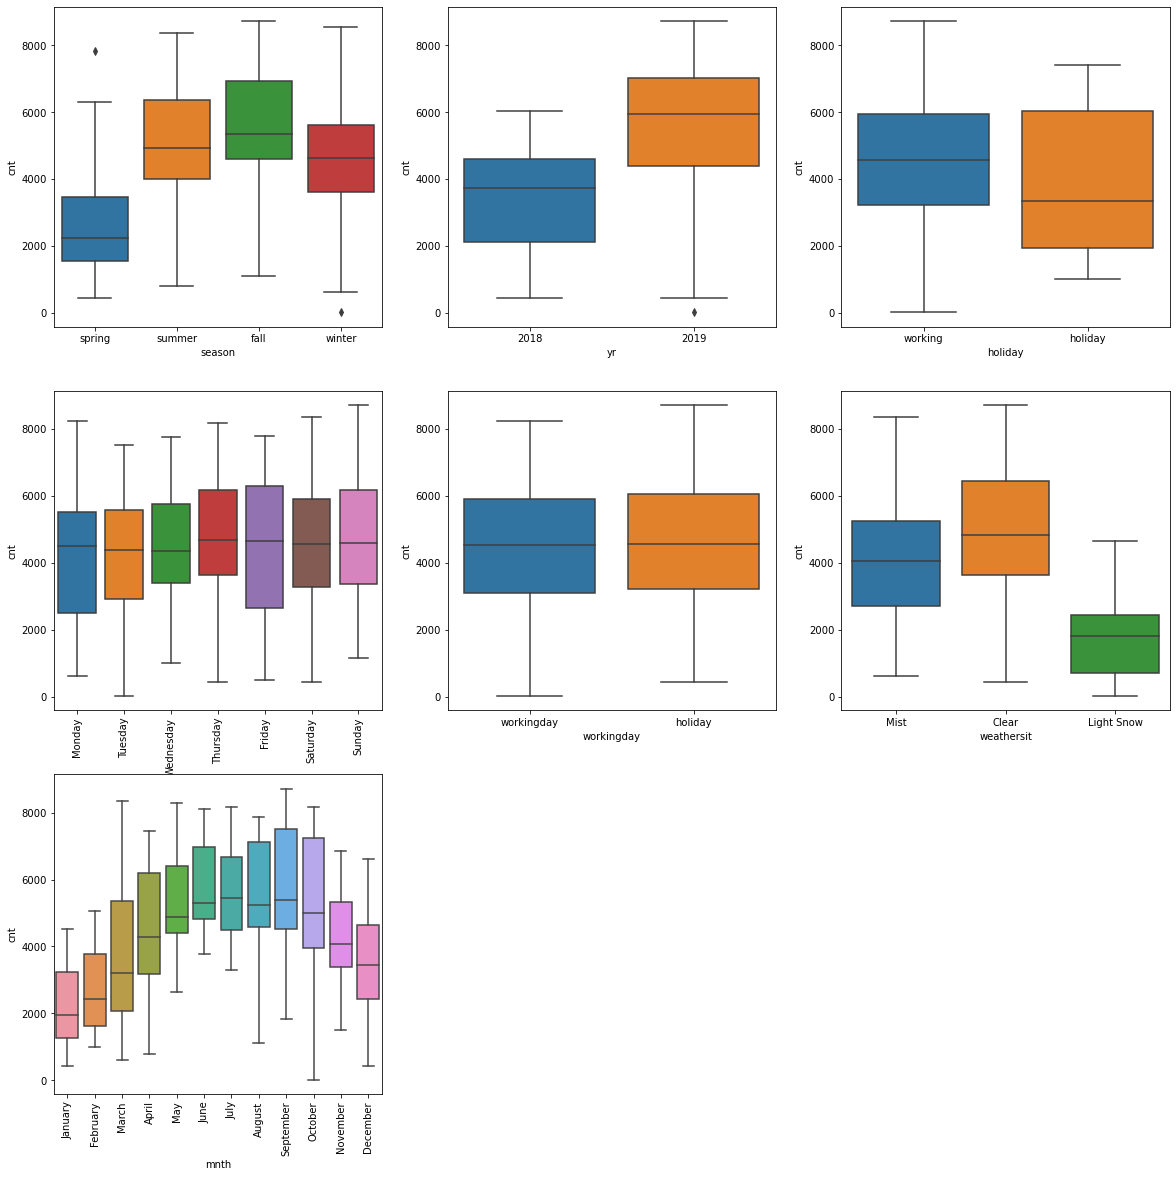

In [139]:
## Visualizing weathersit and seasons

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=day)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y='cnt', data=day)
# do substitute accordingly
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=day)
plt.xticks(rotation=90)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=day)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.subplot(3,3,7)
sns.boxplot(x='mnth', y='cnt', data=day)
plt.xticks(rotation=90)
plt.show();

We can observer that 2019 has more cnt than 2018. Demand increases with each year. Demand is less when there is light snow

<b> Correlation <b>

In [140]:
corr = day.corr()
corr

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
temp,0.150738,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.629896,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


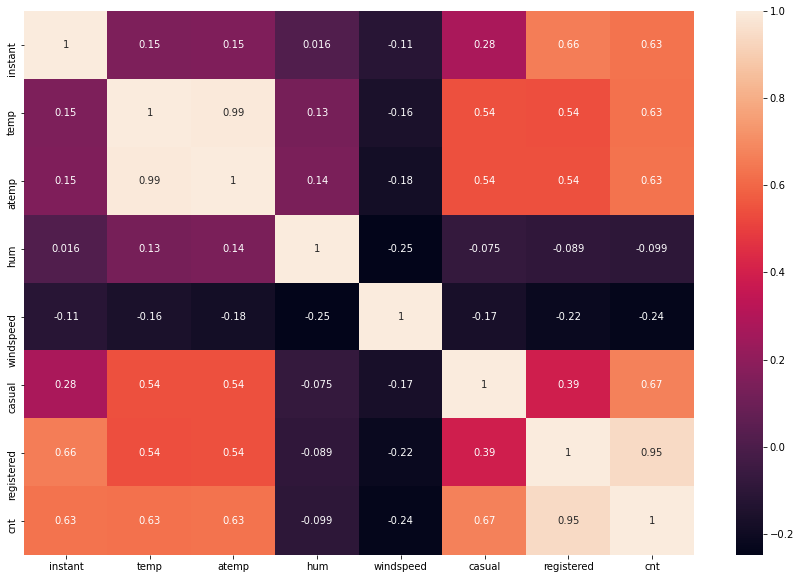

In [141]:
plt.figure(figsize=(15,10))
sns.heatmap(day.corr(),annot=True)
plt.show()

<b>Dropping columns with high correlation<br><b>

temp and a temp it is 0.99. Dropping atemp<br>
cnt and a registered it is 0.95. Dropping registered<br>


In [142]:
day.drop(['atemp'], axis=1, inplace=True)

In [143]:
day.drop(['registered'], axis=1, inplace=True)

In [144]:
day.drop(['casual'], axis=1, inplace=True)

I am deleting casual as well as it is count of casual users and not a feature to determine how revenue can increase. If casual count increases, cnt will increase as cnt = registered users + casual users

### Data Preparation

Removing instant and dteday as they are not significant features for our model

In [145]:
day.drop(['instant'], axis=1, inplace=True)

In [146]:
day.drop(['dteday'], axis=1, inplace=True)

<b>Get Dummies for Season,weathersit,mnth and weekday feature <b>

In [147]:
cols = ['season','mnth','weekday','weathersit','yr','workingday','holiday']
df_dummies = pd.get_dummies(day[cols], drop_first = True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist,yr_2019,workingday_workingday,holiday_working
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [148]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   season_spring          730 non-null    uint8
 1   season_summer          730 non-null    uint8
 2   season_winter          730 non-null    uint8
 3   mnth_August            730 non-null    uint8
 4   mnth_December          730 non-null    uint8
 5   mnth_February          730 non-null    uint8
 6   mnth_January           730 non-null    uint8
 7   mnth_July              730 non-null    uint8
 8   mnth_June              730 non-null    uint8
 9   mnth_March             730 non-null    uint8
 10  mnth_May               730 non-null    uint8
 11  mnth_November          730 non-null    uint8
 12  mnth_October           730 non-null    uint8
 13  mnth_September         730 non-null    uint8
 14  weekday_Monday         730 non-null    uint8
 15  weekday_Saturday       730 non-null    u

In [149]:
day = pd.concat([day, df_dummies], axis = 1)

In [150]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist,yr_2019,workingday_workingday,holiday_working
0,spring,2018,January,working,Monday,workingday,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,0,1,1
1,spring,2018,January,working,Tuesday,workingday,Mist,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,0,1,1
2,spring,2018,January,working,Wednesday,workingday,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,1,1
3,spring,2018,January,working,Thursday,workingday,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,1,1
4,spring,2018,January,working,Friday,workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,1


In [151]:
day.drop(cols, axis = 1, inplace = True)

In [152]:
day.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist,yr_2019,workingday_workingday,holiday_working
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


### Splitting the Data into Training and Testing Sets

In [153]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state=100)

<b>Rescaling the features<b>

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [155]:
df_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist,yr_2019,workingday_workingday,holiday_working
653,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,1
576,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
426,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
482,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1


In [156]:
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist,yr_2019,workingday_workingday,holiday_working
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.507843,0.711765,0.974510
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.500429,0.453386,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


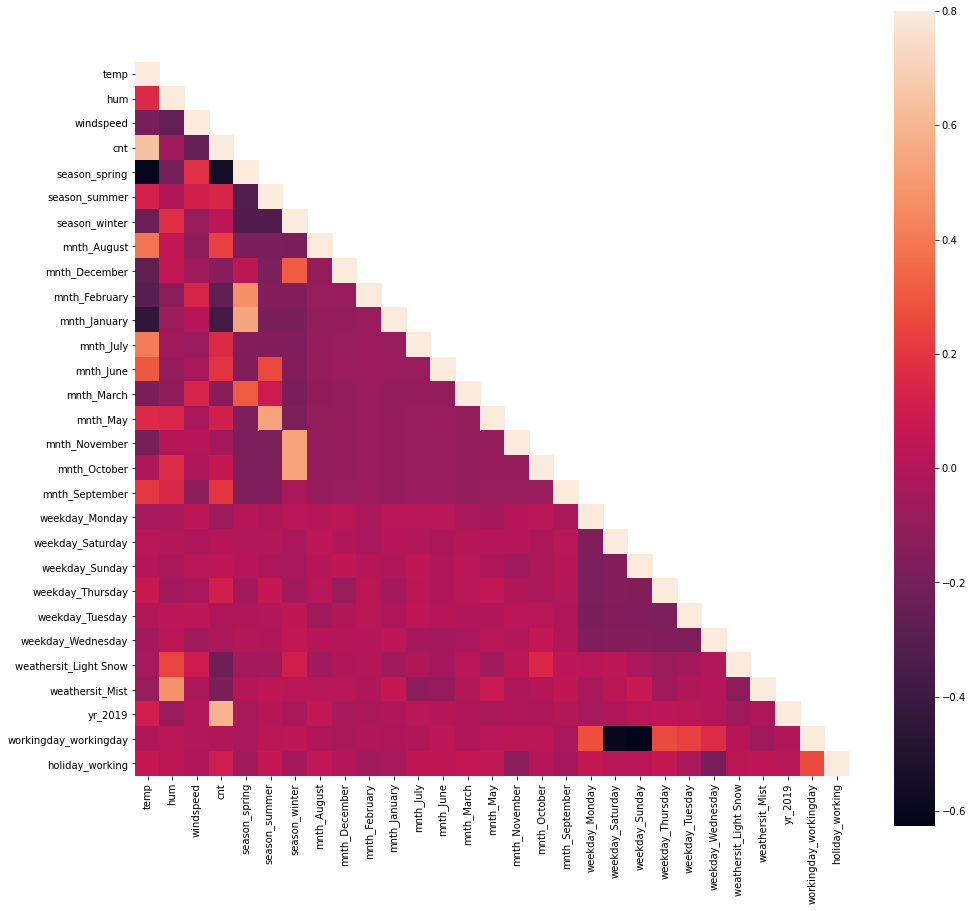

In [157]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 15))
mask = np.array(df_train.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_train.corr(), mask=mask, vmax=.8, square=True)
plt.show()

In [158]:
day.corr().loc[:,"cnt"].abs().sort_values()

weekday_Wednesday        0.013282
weekday_Saturday         0.025004
workingday_workingday    0.027640
weekday_Sunday           0.033227
weekday_Thursday         0.038672
mnth_November            0.040344
weekday_Tuesday          0.049471
weekday_Monday           0.052581
season_winter            0.064619
holiday_working          0.068764
hum                      0.098543
mnth_October             0.108846
mnth_March               0.128456
mnth_May                 0.132553
season_summer            0.145325
mnth_July                0.166236
weathersit_Mist          0.170686
mnth_December            0.173878
mnth_August              0.182100
mnth_September           0.194664
mnth_June                0.195568
windspeed                0.235132
weathersit_Light Snow    0.240602
mnth_February            0.273848
mnth_January             0.367167
season_spring            0.561702
yr_2019                  0.569728
temp                     0.627044
cnt                      1.000000
Name: cnt, dty

### Building Model

In [159]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train


### RFE

In [160]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [161]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [162]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 4),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 8),
 ('mnth_March', False, 9),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 3),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 5),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('yr_2019', True, 1),
 ('workingday_workingday', True, 1),
 ('holiday_working', True, 1)]

In [163]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_May', 'mnth_November', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow',
       'weathersit_Mist', 'yr_2019', 'workingday_workingday',
       'holiday_working'],
      dtype='object')

<b> Building model using statsmodel, for the detailed statistics<b>

Functions to Build model and check VIF

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [165]:
X_train_rfe = X_train[col]

In [166]:
X_train_lm = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          9.48e-186
Time:                        15:39:22   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [167]:
checkVIF(X_train_lm)

,Features,VIF
0,const,143.96
19,workingday_workingday,65.70
15,weekday_Sunday,37.58
14,weekday_Saturday,35.87
20,holiday_working,6.80
4,season_spring,5.80
1,temp,4.89
6,season_winter,3.87
5,season_summer,3.49
9,mnth_January,2.38


<b>Model 2 :removing weekday_Sunday as it has a pvalue of 0.624<b>

In [168]:
X_train_new  = X_train_rfe.drop(["weekday_Sunday"], axis = 1)

In [169]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          8.77e-187
Time:                        15:39:22   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [170]:
checkVIF(X_train_lm)

,Features,VIF
0,const,134.69
4,season_spring,5.79
1,temp,4.89
6,season_winter,3.87
5,season_summer,3.49
9,mnth_January,2.38
2,hum,1.97
8,mnth_February,1.87
18,workingday_workingday,1.83
12,mnth_November,1.81


<b>Model 3 :removing weekday_Saturday has it has a high pvalue of 0.647<b>

In [171]:
X_train_new = X_train_new .drop(["weekday_Saturday"], axis = 1)

In [172]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          7.76e-188
Time:                        15:39:22   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [173]:
checkVIF(X_train_lm)

,Features,VIF
0,const,134.66
4,season_spring,5.79
1,temp,4.88
6,season_winter,3.87
5,season_summer,3.49
9,mnth_January,2.38
2,hum,1.97
8,mnth_February,1.87
12,mnth_November,1.81
7,mnth_December,1.66


<b>Model 4 :removing mnth_May as it has a high p value of 0.160<b>

In [174]:
X_train_new  = X_train_new.drop(["mnth_May"], axis = 1)

In [175]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.60e-188
Time:                        15:39:23   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [176]:
checkVIF(X_train_lm)

,Features,VIF
0,const,130.09
4,season_spring,5.69
1,temp,4.73
6,season_winter,3.84
5,season_summer,2.81
9,mnth_January,2.37
2,hum,1.94
8,mnth_February,1.86
11,mnth_November,1.80
7,mnth_December,1.65


 <b>Model 5 :removing mnth_February as it has a p value of .103<b>

In [177]:
X_train_new  = X_train_new.drop(["mnth_February"], axis = 1)

In [178]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.55e-189
Time:                        15:39:23   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [179]:
checkVIF(X_train_lm)

,Features,VIF
0,const,125.41
4,season_spring,5.27
1,temp,4.43
6,season_winter,3.83
5,season_summer,2.76
2,hum,1.94
10,mnth_November,1.76
8,mnth_January,1.68
13,weathersit_Mist,1.59
7,mnth_December,1.50


 <b>Model 6 :removing workingday_workingday as it has a p value of 0.031. I am removing this as well as it doesnt affect R square much as seen below<b>

In [180]:
X_train_new = X_train_new.drop(["workingday_workingday"], axis = 1)

In [181]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.34e-189
Time:                        15:39:23   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [182]:
checkVIF(X_train_lm)

,Features,VIF
0,const,125.34
4,season_spring,5.27
1,temp,4.42
6,season_winter,3.83
5,season_summer,2.76
2,hum,1.93
10,mnth_November,1.76
8,mnth_January,1.68
13,weathersit_Mist,1.57
7,mnth_December,1.49


 <b>Model 7 :removing mnth_November as it has a p value of 0.029. I am removing this as well as it doesnt affect R square much as seen below<b>

In [183]:
X_train_new = X_train_new.drop(["mnth_November"], axis = 1)

In [184]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.53e-189
Time:                        15:39:23   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     495   BIC:                            -931.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [185]:
checkVIF(X_train_lm)

,Features,VIF
0,const,117.90
4,season_spring,5.10
1,temp,4.14
6,season_winter,3.60
5,season_summer,2.68
2,hum,1.93
8,mnth_January,1.65
12,weathersit_Mist,1.57
9,mnth_July,1.49
10,mnth_September,1.31


<b>Model 8 :removing mnth_December  as it has a p value of .169<b>

In [186]:
X_train_new = X_train_new.drop(["mnth_December"], axis = 1)

In [187]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.45e-190
Time:                        15:39:23   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [188]:
checkVIF(X_train_lm)

,Features,VIF
0,const,116.52
4,season_spring,5.08
1,temp,3.89
6,season_winter,3.60
5,season_summer,2.64
2,hum,1.91
7,mnth_January,1.57
11,weathersit_Mist,1.56
8,mnth_July,1.49
9,mnth_September,1.30


<b>Model 9 :removing mnth_January   as it has a p value of .061<b>  

In [189]:
X_train_new = X_train_new.drop(["mnth_January"], axis = 1)

In [190]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.69e-190
Time:                        15:39:23   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [191]:
checkVIF(X_train_lm)

,Features,VIF
0,const,113.89
4,season_spring,5.02
1,temp,3.61
6,season_winter,3.49
5,season_summer,2.61
2,hum,1.90
10,weathersit_Mist,1.56
7,mnth_July,1.48
8,mnth_September,1.30
9,weathersit_Light Snow,1.24


<b>Model 10 :removing season_spring  as it has a VIF of 5.02 <b>  

In [192]:
X_train_new = X_train_new.drop(["season_spring"], axis = 1)

In [193]:
X_train_lm = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.89e-190
Time:                        15:39:23   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [194]:
checkVIF(X_train_lm)

,Features,VIF
0,const,82.43
2,hum,1.87
1,temp,1.60
9,weathersit_Mist,1.55
6,mnth_July,1.43
4,season_summer,1.33
5,season_winter,1.29
8,weathersit_Light Snow,1.24
7,mnth_September,1.19
3,windspeed,1.18


This could be our final model as all p values are 0,prob(F-statistics) is close to 0 and R squared is 0.840. VIFs for all feature variables are also less than 5 which is in acceptable range

Checking top features affecting the cnt

In [195]:
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
lm.params

temp                     0.607426
hum                     -0.105212
windspeed               -0.149354
season_summer            0.079516
season_winter            0.138008
mnth_July               -0.048999
mnth_September           0.095180
weathersit_Light Snow   -0.256105
weathersit_Mist         -0.061724
yr_2019                  0.231676
holiday_working          0.159435
dtype: float64

In [196]:
lm.params.abs().sort_values(ascending=False)

temp                     0.607426
weathersit_Light Snow    0.256105
yr_2019                  0.231676
holiday_working          0.159435
windspeed                0.149354
season_winter            0.138008
hum                      0.105212
mnth_September           0.095180
season_summer            0.079516
weathersit_Mist          0.061724
mnth_July                0.048999
dtype: float64

Top three features are temp, weathersit_Light Snow and year

### Resiudal Analysis of Train data

In [197]:

y_pred = lm.predict(X_train_new)
residual = y_train - y_pred

Text(0.5, 0, 'Errors')

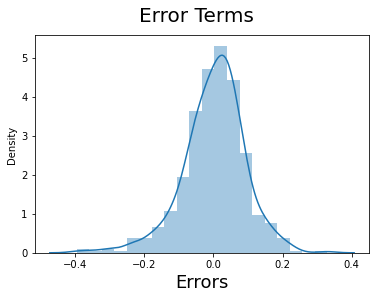

In [198]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

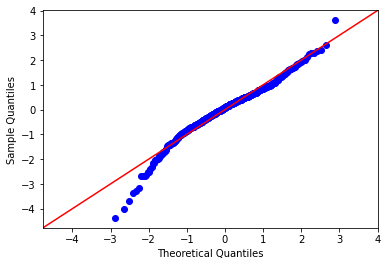

In [199]:
sm.qqplot(residual,fit=True,line='45')
plt.show()

<b>Homescedasticity<b>

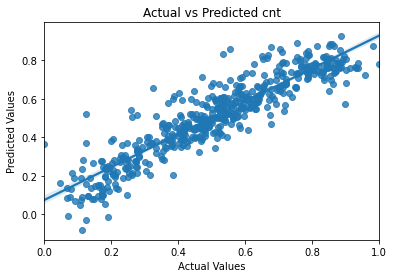

In [200]:
sns.regplot(y_train,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted cnt")
plt.show()

<b> Error Terms are independent <b>

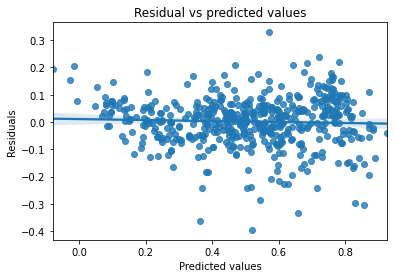

In [201]:
sns.regplot(y_pred,residual)
plt.title('Residual vs predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

There is no relation between residual and predicted values

### Making predictions using final model

In [202]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [203]:
df_test.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist,yr_2019,workingday_workingday,holiday_working
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.479452,0.639269,0.963470
std,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.500722,0.481313,0.188034
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Divding into Xtest and Ytest

In [204]:
y_test = df_test.pop('cnt')
X_test = df_test[col]

In [205]:
X_test_sm = sm.add_constant(X_test)

In [206]:
X_test_sm = X_test_sm.drop(["mnth_May","weekday_Sunday","weekday_Saturday","season_spring","mnth_November","mnth_December","mnth_February","workingday_workingday","mnth_January"], axis = 1)

In [207]:
lm = sm.OLS(y_test,X_test_sm).fit()

In [208]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   temp                   219 non-null    float64
 2   hum                    219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_summer          219 non-null    uint8  
 5   season_winter          219 non-null    uint8  
 6   mnth_July              219 non-null    uint8  
 7   mnth_September         219 non-null    uint8  
 8   weathersit_Light Snow  219 non-null    uint8  
 9   weathersit_Mist        219 non-null    uint8  
 10  yr_2019                219 non-null    uint8  
 11  holiday_working        219 non-null    uint8  
dtypes: float64(4), uint8(8)
memory usage: 10.3 KB


In [209]:
y_test_pred = lm.predict(X_test_sm)

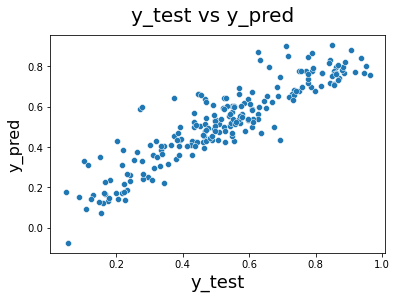

In [210]:
fig = plt.figure()
sns.scatterplot(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)  
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [211]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [212]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8182739359007962

In [213]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09290439320269994

In [214]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7999177678099676

R2 of train model was .84 and test is .818. Since R2 for both train and test is above 80,this is a good model<br> Adjusted R2 for train model was 0.836 and for test it is .80